## Data Warehouse and Data Mining: _Project_
### Team Number: 5                                                                                                          
Team Members:
- 07801012018: Astha Jain   
- 11801012018: Dviti Arora
- 12001012018: Neha Pandey
- 12401012018: Aaniya Agrawala
- 13701012018: Vidhi Katyal

# BREAST CANCER DETECTION USING DECISION TREE ALGORITHM (ID3)
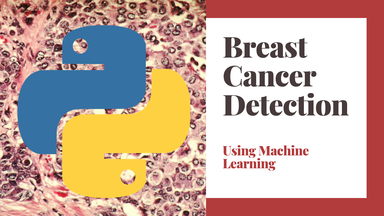

## INTRODUCTION:
Breast cancer (BC) is one of the most common cancers among women worldwide, representing the majority of new cancer cases and cancer-related deaths according to global statistics, making it a significant public health problem in today’s society.

The early diagnosis of BC can improve the prognosis and chance of survival significantly, as it can promote timely clinical treatment to patients. Further accurate classification of benign tumors can prevent patients undergoing unnecessary treatments. Thus, the correct diagnosis of BC and classification of patients into malignant or benign groups is the subject of much research. Because of its unique advantages in critical features detection from complex BC datasets, machine learning (ML) is widely recognized as the methodology of choice in BC pattern classification and forecast modelling.

Classification and data mining methods are an effective way to classify data. Especially in medical field, where those methods are widely used in diagnosis and analysis to make decisions.

## OUR MISSION:

We will be using Decision Tree algorithm (ID3) to on the [Breast Cancer Dataset](http://archive.ics.uci.edu/ml/datasets/breast+cancer+wisconsin+%28diagnostic%29) to classify whether the breast cancer is benign(non-cancerous) or malignant(cancerous). The algorithm is implemented from scratch in Python, using only numpy, pandas, and matplotlib libraries.

## OVERVIEW:

- Step 0: Introduction to Decision Tree Algorithm
- Step 1: Data exploration and Preprocessing
- Step 2: Categorical Data Encoding
- Step 3: Custom Implementation for Decision Tree
- Step 4: Evaluating our Custom Model
- Step 5: Visualisation of the Decision Tree using sklearn's DecisionTreeClassifier model

### Step 0: Introduction to Decision Tree Algorithm

#### What Is The Use Of A Decision Tree?
Decision Tree is used to build classification and regression models. It is used to create data models that will predict class labels or values for the decision-making process. The models are built from the training dataset fed to the system (supervised learning).

Using a decision tree, we can visualize the decisions that make it easy to understand and thus it is a popular data mining technique.

#### How Does A Decision Tree Work?
ID3 uses a top-down greedy approach to build a decision tree. In simple words, the top-down approach means that we start building the tree from the top and the greedy approach means that at each iteration we select the best feature at the present moment to create a node.
##### Example:
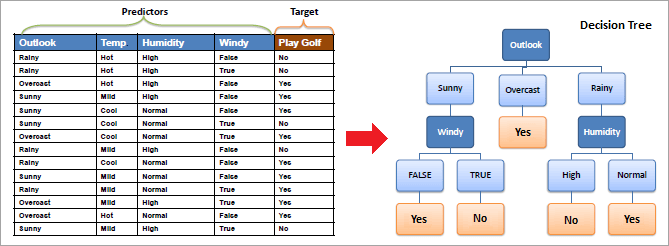

#### Steps for Building a Decision Tree 
1. Calculate the Information Gain of each feature.
2. Considering that all rows don’t belong to the same class, split the dataset S into subsets using the feature for which the Information Gain is maximum.
3. Make a decision tree node using the feature with the maximum Information gain.
4. If all rows belong to the same class, make the current node as a leaf node with the class as its label.
5. Repeat for the remaining features until we run out of all features, or the decision tree has all leaf nodes.

### Step 1: Data Exploration and Preprocessing

In [1]:
# Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Importing the dataset
data = pd.read_csv('data.csv')
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [4]:
# Dropping 'id' because it is not needed, 
# and 'Unnamed: 32' because all values present in it are null.
data= data.drop(['id',  'Unnamed: 32'], axis=1)    # Axis = 1 for columns, Axis=0 for rows
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
# Target variable is diagnosis
y = data['diagnosis']
print(y[:25])

0     M
1     M
2     M
3     M
4     M
5     M
6     M
7     M
8     M
9     M
10    M
11    M
12    M
13    M
14    M
15    M
16    M
17    M
18    M
19    B
20    B
21    B
22    M
23    M
24    M
Name: diagnosis, dtype: object


<AxesSubplot:>

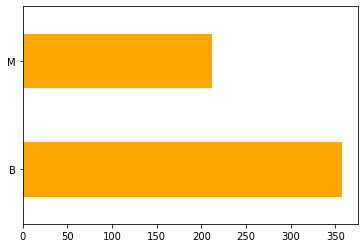

In [6]:
# Visualising the values stored in y
pd.value_counts(y).plot(kind='barh', color='orange')

In [7]:
# Features relevant to Algorithm
columns=['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']

array([[<AxesSubplot:title={'center':'radius_mean'}>,
        <AxesSubplot:title={'center':'texture_mean'}>,
        <AxesSubplot:title={'center':'perimeter_mean'}>,
        <AxesSubplot:title={'center':'area_mean'}>,
        <AxesSubplot:title={'center':'smoothness_mean'}>,
        <AxesSubplot:title={'center':'compactness_mean'}>],
       [<AxesSubplot:title={'center':'concavity_mean'}>,
        <AxesSubplot:title={'center':'concave points_mean'}>,
        <AxesSubplot:title={'center':'symmetry_mean'}>,
        <AxesSubplot:title={'center':'fractal_dimension_mean'}>,
        <AxesSubplot:title={'center':'radius_se'}>,
        <AxesSubplot:title={'center':'texture_se'}>],
       [<AxesSubplot:title={'center':'perimeter_se'}>,
        <AxesSubplot:title={'center':'area_se'}>,
        <AxesSubplot:title={'center':'smoothness_se'}>,
        <AxesSubplot:title={'center':'compactness_se'}>,
        <AxesSubplot:title={'center':'concavity_se'}>,
        <AxesSubplot:title={'center':'concave

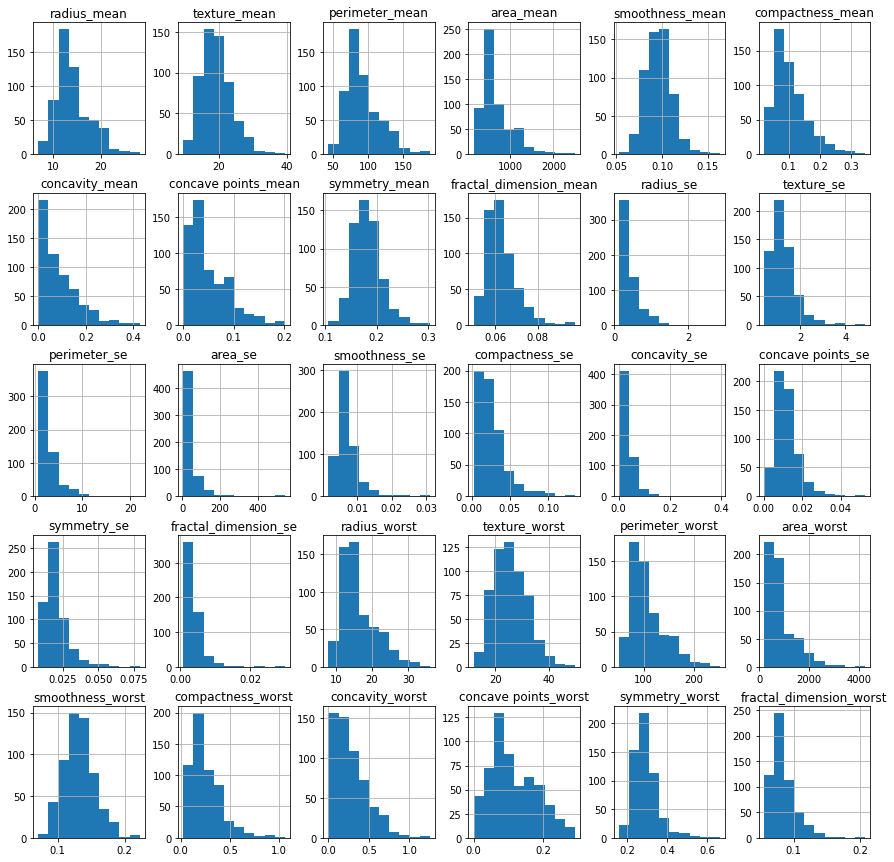

In [8]:
# Visualising the values stored in columns
X = data
X.drop(['diagnosis'], axis=1)
X.hist(layout=(5,6), figsize=(15,15))

### Step 2: Categorical Data Encoding

In [9]:
# Diagnosis column has 2 categorical values, we replace 'B' with 0 and 'M' with 1
data['diagnosis']= data['diagnosis'].apply(lambda x: '0' if x=='B' else '1')
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## Step 3: Custom Implementation for Decision Tree

#### Entropy

Entropy is calculated as:

`Entropy(S) = - ∑ pᵢ * log₂(pᵢ) ; i = 1 to n`

where,
**n** is the total number of classes in the target column (in our case n = 2 i.e YES and NO)

**pᵢ** is the probability of class ‘i’ or the ratio of _“number of rows with class i in the target column”_ to the _“total number of rows”_ in the dataset.

In [10]:
def entropy(col):
  data,counts=np.unique(col,return_counts=True)
  # total items
  N=float(len(col))
  ent=0.0

  for count in counts:
    p=count/N
    ent+=(p*np.log2(p))

  return -ent

#### Information Gain

Information Gain for a feature column A is calculated as:

`IG(S, A) = Entropy(S) - ∑((|Sᵥ| / |S|) * Entropy(Sᵥ))`

where **Sᵥ** is the set of rows in **S** for which the feature column A has value v, 

**|Sᵥ|** is the number of rows in Sᵥ and likewise **|S|** is the number of rows in S.

In [11]:
def divide_data(x_data,fkey,fval):
  x_right=pd.DataFrame([],columns=x_data.columns)
  x_left=pd.DataFrame([],columns=x_data.columns)

  for xi in range(x_data.shape[0]):
    val=x_data[fkey].iloc[xi]   # iloc: index based location

    if val>fval:
      x_right=x_right.append(x_data.loc[xi])
    else:
      x_left=x_left.append(x_data.loc[xi])
  return x_left,x_right

In [12]:
# for binary tree
# if root node is salary, then fkey=salary
# if (left child) is <10lac and (right child) more than 10lac, then fval=10
def information_gain(x_data,fkey,fval):
  left,right=divide_data(x_data,fkey,fval)

  # % of examples in left and right
  l=float(left.shape[0]/x_data.shape[0])
  r=float(right.shape[0]/x_data.shape[0])

  hs=entropy(x_data.diagnosis)

  igain=hs-(l*entropy(left.diagnosis)+r*entropy(right.diagnosis))
  return igain

**The class Decision Tree** builds a binary tree, splitting the dataset at every node according to  the mean value of the chosen attribute. The splitting attribute at each level of the tree is chosen as the attribute having the maximum information gain. The leaf nodes of the tree return the label/decision for a given tuple.

In [13]:
class DecisionTree:
  def __init__(self,depth=0,max_depth=5):
    self.left=None
    self.right=None
    self.fkey=None
    self.fval=None
    self.max_depth=max_depth
    self.depth=depth
    self.target=None

  def fit(self,X_train):
    features=columns
    info_gains=[]

    for ix in features:
      i_gain=information_gain(X_train,ix,X_train[ix].mean())
      info_gains.append(i_gain)

    self.fkey=features[np.argmax(info_gains)]
    self.fval=X_train[self.fkey].mean()
    #print("I am choosing feature ",self.fkey)

    # create tree
    # split data
    data_left,data_right=divide_data(X_train,self.fkey,self.fval)

    # reset index again from start
    data_left=data_left.reset_index(drop=True)
    data_right=data_right.reset_index(drop=True)

    #base case: reached the leaf node
    if data_left.shape[0]==0 or data_right.shape[0]==0:   # no further splitting possible
      if X_train.diagnosis.mean()>=0.5:
        self.target=1
      else:
        self.target=0
      return

    # stop early when depth >max_depth
    if self.depth>=self.max_depth:
      if X_train.diagnosis.mean()>=0.5:
        self.target=1
      else:
        self.target=0
      return

    # Recursion
    self.left=DecisionTree(depth=self.depth+1)
    self.left.fit(data_left)
    self.right=DecisionTree(depth=self.depth+1)
    self.right.fit(data_right)

  def predict_row(self,test):
    if test[self.fkey]>self.fval:
      # go to right
      if self.right is None:
        return self.target
      return self.right.predict_row(test)
    else:
      # go to left
      if self.left is None:
        return self.target
      return self.left.predict_row(test)

  def predict(self,X):
    return np.array([self.predict_row(X.loc[i]) for i in range(X.shape[0])])

  def accuracy_score(self,test_data,y_test):
    pred=self.predict(test_data)
    return np.mean(y_test==pred)

  def precision_score(self,test_data,y_test):
    pred=self.predict(test_data)
    tp = len(np.intersect1d(np.where(y_test==1), np.where(pred==1)))
    return tp/np.sum((pred==1))

  def recall_score(self,test_data,y_test):
    pred=self.predict(test_data)
    tp = len(np.intersect1d(np.where(y_test==1), np.where(pred==1)))
    return tp/np.sum(y_test==1)


In [14]:
# Using custom implementation
dt=DecisionTree()

The data we use is usually **split into training data and test data**. 

The training set contains a known output and the model learns on this data in order to be generalized to other data later on. We have the test dataset (or subset) in order to test our model’s prediction on this subset.
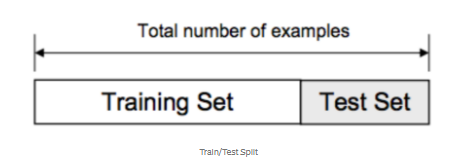

In [15]:
# Splitting the data into Train and Test set
split=int(0.7*data.shape[0])
train_data=data[:split]
test_data=data[split:]
test_data=data.reset_index(drop=True)

**Fitting** is a process where we run an algorithm on data for which we know the target variable, known as “labeled” data, and produce a machine learning model. Then, we compare the outcomes to real, observed values of the target variable to determine their accuracy.

In [16]:
# Fitting the Decision Tree classifier to the training data
dt.fit(train_data)

In [17]:
y_test=test_data['diagnosis']
y_test=y_test.astype('int')
y_test=y_test.to_numpy().reshape((test_data.shape[0]),)

### Step 4: Evaluating our Custom Model

One of the most important steps in any data mining process is to evaluate our model. For this, the commonly used evaluation techniques are accuracy, precision, and recall.
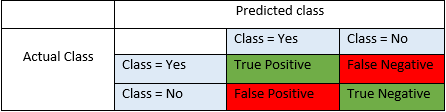
- **True Positives (TP)** - These are the correctly predicted positive values which means that the value of actual class is yes and the value of predicted class is also yes. (Patient with breast cancer is detected as malignant)
- **True Negatives (TN)** - These are the correctly predicted negative values which means that the value of actual class is no and value of predicted class is also no. (Patient without breast cancer is detected as benign)
- **False Positives (FP)** – When actual class is no and predicted class is yes. (Patient without breast cancer is detected as malignant)
- **False Negatives (FN)** – When actual class is yes but predicted class in no. (Patient with breast cancer is detected as benign)
- **Accuracy** - Accuracy is the most intuitive performance measure and it is simply a ratio of correctly predicted observation to the total observations.  
`Accuracy = TP+TN/TP+FP+FN+TN`
- **Precision** - Precision is the ratio of correctly predicted positive observations to the total predicted positive observations.
`Precision = TP/TP+FP`
- **Recall (Sensitivity)** - Recall is the ratio of correctly predicted positive observations to the all observations in actual class - yes.
`Recall = TP/TP+FN`

**Since for detection of breast cancer, it is very important to ensure that there are no false negatives (Patient having breast cancer diagnosed as benign i.e. non-cancerous), hence the model should have a _high recall score_.**

In [18]:
print('Accuracy is: ', dt.accuracy_score(test_data,y_test))
print('Precision is: ', dt.precision_score(test_data,y_test))
print('Recall is: ', dt.recall_score(test_data,y_test))

Accuracy is:  0.9121265377855887
Precision is:  0.8091603053435115
Recall is:  1.0


## Hence, we have achieved a high recall model with _Accuracy: 91.21%_ , _Precision: 80.91%_ and _Recall: 100%_.

### Step 5: Visualisation of the Decision Tree

In this step, we are only concerned with visualising how a Decision Tree looks like. Hence, we will use sklearn's DecisionTreeClassifier model to train the classifier. Then, we will use the graphviz library to visualise the Decision Tree.

In [19]:
# Importing the libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import graphviz
from sklearn import tree

# Assigning X and y
X=data[columns]
y=data['diagnosis']

In [20]:
# Initialising Decision Tree classifier, fitting it to the data and scoring it
sk_tree=DecisionTreeClassifier(criterion='entropy',max_depth=5)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
sk_tree.fit(X_train,y_train)
sk_tree.score(X_test,y_test)

0.9521276595744681

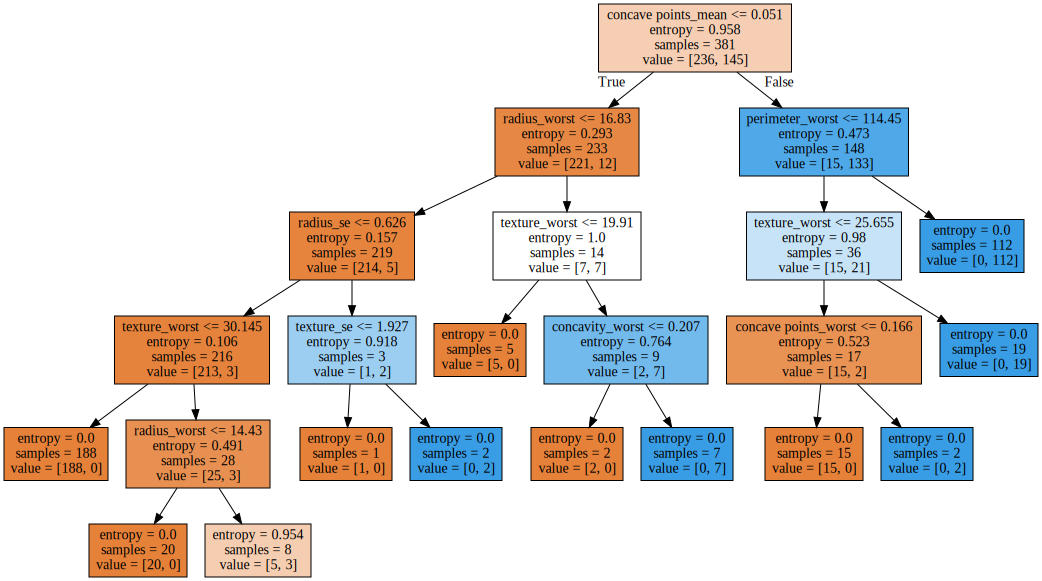

In [21]:
#Visualising the decision tree
dot_data = tree.export_graphviz(sk_tree, feature_names=X.columns, out_file=None, filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph